# UNSW-NB15 Dataset - Exploratory Data Analysis

Analysis of missing values and label distribution for the UNSW-NB15 network traffic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

## Load UNSW-NB15 Dataset

In [2]:
# Define path and get CSV files
unsw_path = '/home/sagemaker-user/data/UNSW_NB15'
unsw_files = sorted(Path(unsw_path).glob('*.csv'))

print(f"UNSW_NB15 files: {len(unsw_files)}")
for file in unsw_files:
    print(f"  - {file.name}")

UNSW_NB15 files: 4
  - UNSW-NB15_1.csv
  - UNSW-NB15_2.csv
  - UNSW-NB15_3.csv
  - UNSW-NB15_4.csv


In [ ]:
# Load and concatenate all files
print("Loading UNSW_NB15 dataset...")

unsw_dfs = []
for i, file in enumerate(unsw_files, 1):
    print(f"  [{i}/{len(unsw_files)}] {file.name}")
    df = pd.read_csv(file)
    unsw_dfs.append(df)

unsw_data = pd.concat(unsw_dfs, ignore_index=True)
print(f"\nTotal shape: {unsw_data.shape}")
print(f"Rows: {unsw_data.shape[0]:,}")
print(f"Columns: {unsw_data.shape[1]}")

Loading UNSW_NB15 dataset...
  [1/4] UNSW-NB15_1.csv


/tmp/ipykernel_3785/3427984861.py:7: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


  [2/4] UNSW-NB15_2.csv


/tmp/ipykernel_3785/3427984861.py:7: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


  [3/4] UNSW-NB15_3.csv
  [4/4] UNSW-NB15_4.csv


In [ ]:
print(unsw_data.head())

## Missing Values Analysis

In [4]:
print("UNSW-NB15 MISSING VALUES\n")

missing = unsw_data.isnull().sum()
missing_pct = (missing / len(unsw_data)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(f"Total missing values: {missing.sum():,}")
print(f"Columns with missing values: {(missing > 0).sum()}")
print(f"Total columns: {len(missing)}")

if missing.sum() > 0:
    print("\nColumns with missing values:")
    display(missing_df[missing_df['Missing Count'] > 0])
else:
    print("\nNo missing values found!")

UNSW-NB15 MISSING VALUES

Total missing values: 233,600,650
Columns with missing values: 129
Total columns: 139

Columns with missing values:


,Missing Count,Percentage
Unnamed: 38,2522839,99.322689
Unnamed: 37,2462887,96.962414
Unnamed: 47,2218760,87.351277
37552,2100000,82.675766
3380,2100000,82.675766
...,...,...
FIN,700000,27.558589
255.1,700000,27.558589
tcp,700000,27.558589
2.1,700000,27.558589


## Label Distribution Analysis

**Label Structure**: Binary label (0 = Benign, 1 = Malicious) + Attack categories (Fuzzers, Exploits, DoS, Generic, Reconnaissance, Shellcode, Worms, Backdoors, Analysis)

In [5]:
print("UNSW-NB15 LABEL DISTRIBUTION\n")

# Check for binary label column
binary_col = None
attack_cat_col = None

for col in unsw_data.columns:
    if col.lower() == 'label':
        binary_col = col
    elif 'attack_cat' in col.lower() or col.lower() == 'attack_cat':
        attack_cat_col = col

# Binary label distribution
if binary_col:
    print(f"1. Binary Label: '{binary_col}'")
    binary_dist = unsw_data[binary_col].value_counts().sort_index()
    binary_pct = (binary_dist / len(unsw_data) * 100)
    
    binary_df = pd.DataFrame({
        'Count': binary_dist,
        'Percentage': binary_pct
    })
    display(binary_df)
    print(f"\nTotal samples: {len(unsw_data):,}")
else:
    print("Binary label column not found")

# Attack category distribution
if attack_cat_col:
    print(f"\n2. Attack Categories: '{attack_cat_col}'")
    attack_dist = unsw_data[attack_cat_col].value_counts()
    attack_pct = (attack_dist / len(unsw_data) * 100)
    
    attack_df = pd.DataFrame({
        'Count': attack_dist,
        'Percentage': attack_pct.round(2)
    })
    display(attack_df)
    print(f"\nUnique attack types: {unsw_data[attack_cat_col].nunique()}")
else:
    print("Attack category column not found")

UNSW-NB15 LABEL DISTRIBUTION

Binary label column not found
Attack category column not found


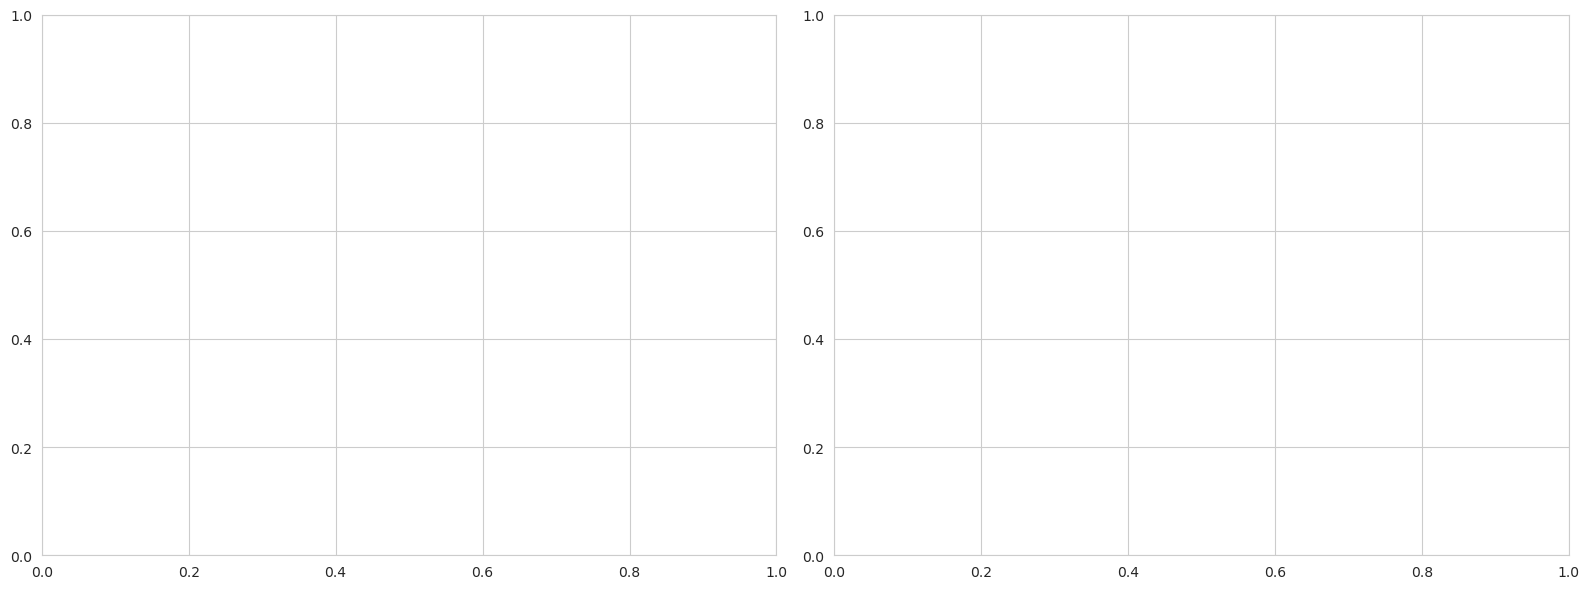

In [6]:
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

if binary_col:
    binary_dist.plot(kind='bar', ax=axes[0], color=['green', 'red'])
    axes[0].set_title('UNSW-NB15: Binary Label Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Label (0=Benign, 1=Malicious)')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)

if attack_cat_col:
    attack_dist.plot(kind='barh', ax=axes[1], color='steelblue')
    axes[1].set_title('UNSW-NB15: Attack Category Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel('Attack Category')

plt.tight_layout()
plt.show()